<h1>EDA</h1>

<h2>Imports</h2>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Data & Munging</h2>

In [3]:
homelessness = pd.read_csv('../data/homelessness/homelessness_cleaning/2014-2021-PIT-esimates-cleanish.csv')

/home/andrew/anaconda3/envs/dsi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (543) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
env = pd.read_csv('../data/weather-population/city_data.csv')

In [5]:
econ2017 = pd.read_csv('../data/housing-cost/cleaned/income_2017.csv')
econ2018 = pd.read_csv('../data/housing-cost/cleaned/income_2018.csv')
econ2019 = pd.read_csv('../data/housing-cost/cleaned/income_2019.csv')

In [6]:
econ2017['year'] = '2017'
econ2017['city, state'] = econ2017['city'] + ', ' + econ2017['state']
econ2018['year'] = '2018'
econ2018['city, state'] = econ2018['city'] + ', ' + econ2018['state']
econ2019['year'] = '2019'
econ2019['city, state'] = econ2019['city'] + ', ' + econ2019['state']

In [7]:
econ2017.columns = econ2017.columns.str.replace('_2017', '')
econ2018.columns = econ2018.columns.str.replace('_2018', '')
econ2019.columns = econ2019.columns.str.replace('_2019', '')

In [8]:
econ = pd.concat([econ2017,econ2018, econ2019])

In [9]:
econ.head()

,city,state,median household income (dollars),monthly cost,owner occupied income,owner occupied cost,renter occupied income,renter occupied cost,year,"city, state"
0,abbeville,la,41082,514,51168,399,23326,643,2017,"abbeville, la"
1,abbeville,sc,22898,549,32998,572,14408,544,2017,"abbeville, sc"
2,abbotsford,wi,42043,608,53068,667,28594,576,2017,"abbotsford, wi"
3,aberdeen,ms,29317,578,44957,622,18199,537,2017,"aberdeen, ms"
4,aberdeen,sd,47342,721,70839,840,30029,641,2017,"aberdeen, sd"


In [10]:
homelessness.head()

,Unnamed: 0,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
0,0,AK-500,Anchorage CoC,1023.0,188.0,146.0,689.0,665.0,86.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
1,1,AK-501,Alaska Balance of State CoC,761.0,209.0,56.0,496.0,474.0,119.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
2,2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1329.0,262.0,76.0,991.0,387.0,47.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,birmingham,al
3,3,AL-501,Mobile City & County/Baldwin County CoC,598.0,126.0,44.0,428.0,287.0,69.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,al
4,4,AL-502,Florence/Northwest Alabama CoC,209.0,50.0,6.0,153.0,38.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,florence,al


In [11]:
homelessness.columns = homelessness.columns.str.lower()

In [12]:
homelessness['overall homeless'].head()

0    1023.0
1     761.0
2    1329.0
3     598.0
4     209.0
Name: overall homeless, dtype: float64

In [13]:
homelessness.columns = homelessness.columns.str.lower()

In [14]:
env = env.rename(columns={'usps':'state'})

In [15]:
env.dropna(inplace=True)

In [16]:
env.head()

,city,Jan,April,July,Oct,Precip “,precip days,snowfall,rank,state,...,Growth / Decline,Rank_y,Population (2013),Budget,Mayor,Took office,Term ends,Government type,City elections in 2021?,Mayoral election in 2021?
1,Albuquerque,35.7,55.6,78.5,57.3,9.47,60,11,32.0,NM,...,9565.0,32.0,556495.0,"$893,000,000",Tim Keller (D),2017.0,2022.0,Strong mayor,Yes,Yes
4,Atlanta,42.7,61.6,80.0,62.8,50.20,115,2.1,37.0,GA,...,23772.0,40.0,447841.0,"$533,000,000",Keisha Bottoms (D),2018.0,2022.0,Strong mayor,Yes,Yes
6,Austin,50.2,68.3,84.2,70.6,33.65,85,0.9,10.0,TX,...,52202.0,12.0,885400.0,"$3,500,000,000",Stephen Adler (D),2015.0,2023.0,Strong mayor,No,No
7,Baltimore,32.3,53.2,76.5,55.4,41.94,115,21.5,31.0,MD,...,381.0,26.0,622104.0,"$1,648,000,000",Brandon M. Scott (D),2020.0,2024.0,Strong mayor,No,No
8,Baton Rouge,50.1,66.6,81.7,68.1,63.08,110,0.2,108.0,LA,...,565.0,92.0,229426.0,"$830,000,000",Sharon Weston Broome (D),2017.0,2024.0,Strong mayor,Yes,No


In [17]:
env.head()

,city,Jan,April,July,Oct,Precip “,precip days,snowfall,rank,state,...,Growth / Decline,Rank_y,Population (2013),Budget,Mayor,Took office,Term ends,Government type,City elections in 2021?,Mayoral election in 2021?
1,Albuquerque,35.7,55.6,78.5,57.3,9.47,60,11,32.0,NM,...,9565.0,32.0,556495.0,"$893,000,000",Tim Keller (D),2017.0,2022.0,Strong mayor,Yes,Yes
4,Atlanta,42.7,61.6,80.0,62.8,50.20,115,2.1,37.0,GA,...,23772.0,40.0,447841.0,"$533,000,000",Keisha Bottoms (D),2018.0,2022.0,Strong mayor,Yes,Yes
6,Austin,50.2,68.3,84.2,70.6,33.65,85,0.9,10.0,TX,...,52202.0,12.0,885400.0,"$3,500,000,000",Stephen Adler (D),2015.0,2023.0,Strong mayor,No,No
7,Baltimore,32.3,53.2,76.5,55.4,41.94,115,21.5,31.0,MD,...,381.0,26.0,622104.0,"$1,648,000,000",Brandon M. Scott (D),2020.0,2024.0,Strong mayor,No,No
8,Baton Rouge,50.1,66.6,81.7,68.1,63.08,110,0.2,108.0,LA,...,565.0,92.0,229426.0,"$830,000,000",Sharon Weston Broome (D),2017.0,2024.0,Strong mayor,Yes,No


In [18]:
homelessness['state'] = homelessness['state'].str.lower()
homelessness['city'] = homelessness['city'].str.lower()
env['city'] = env['city'].str.lower()
env['state'] = env['state'].str.lower()

In [19]:
homelessness['overall homeless'].isnull().sum()

7

In [20]:
df = pd.merge(env, homelessness, on=['city', 'state'], how='left')
df.shape

(352, 571)

In [21]:
df['overall homeless'].isnull().sum()

2

In [22]:
env['city']

1        albuquerque
4            atlanta
6             austin
7          baltimore
8        baton rouge
10        birmingham
12             boise
13            boston
15           buffalo
21         charlotte
23           chicago
24         cleveland
26          columbus
27          columbus
30            denver
32           detroit
35           el paso
42          honolulu
43           houston
44      indianapolis
46      jacksonville
51         las vegas
54        long beach
55       los angeles
57           madison
58           memphis
59             miami
60         milwaukee
66            newark
67       new orleans
68          new york
69           norfolk
72             omaha
73      philadelphia
74           phoenix
75        pittsburgh
76          portland
77          portland
79           raleigh
80              reno
83        sacramento
85       san antonio
86         san diego
87     san francisco
94         st. louis
95             tampa
96            toledo
97           

In [23]:
econ2017.columns=econ2017.columns.str.lower()

In [24]:
df.shape

(352, 571)

In [25]:
econ2017.columns

Index(['city', 'state', 'median household income (dollars)', 'monthly cost',
       'owner occupied income', 'owner occupied cost',
       'renter occupied income', 'renter occupied cost', 'year',
       'city, state'],
      dtype='object')

In [26]:
df.columns

Index(['city', 'Jan', 'April', 'July', 'Oct ', 'Precip “', 'precip days',
       'snowfall', 'rank', 'state',
       ...
       'unsheltered homeless parenting youth (under 25) - gender non-conforming',
       'unsheltered homeless parenting youth (under 25) - non-hispanic/non-latino',
       'unsheltered homeless parenting youth (under 25) - hispanic/latino',
       'unsheltered homeless parenting youth (under 25) - white',
       'unsheltered homeless parenting youth (under 25) - black or african american',
       'unsheltered homeless parenting youth (under 25) - asian',
       'unsheltered homeless parenting youth (under 25) - american indian or alaska native',
       'unsheltered homeless parenting youth (under 25) - native hawaiian or other pacific islander',
       'unsheltered homeless parenting youth (under 25) - multiple races',
       'coc category'],
      dtype='object', length=571)

In [27]:
df = pd.merge(df, econ2017, on=['city', 'state'], how='left')

In [28]:
df.shape

(352, 579)

In [29]:
df.dropna().shape

(27, 579)

In [30]:
df = df.drop(columns= ['Mayor', 'City elections in 2021?', 'coc number', 'coc name', 'coc category', 'year_y', 'Mayoral election in 2021?', 'city, state'])


In [31]:
df.select_dtypes(object).head(2)

,city,snowfall,state,Budget,Government type
0,albuquerque,11,nm,"$893,000,000",Strong mayor
1,albuquerque,11,nm,"$893,000,000",Strong mayor


In [32]:
df.columns = df.columns.str.lower()

In [33]:
df['snowfall'] = df['snowfall'].map({'trace': 0})
df['snowfall'] = df['snowfall'].astype(float)

In [34]:
df['budget'] = df['budget'].str.replace('$', '')
df['budget'] = df['budget'].str.replace(',', '')

<ipython-input-34-480cb301328a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['budget'] = df['budget'].str.replace('$', '')


In [35]:
df.select_dtypes(object).head(2)

,city,state,budget,government type
0,albuquerque,nm,893000000,Strong mayor
1,albuquerque,nm,893000000,Strong mayor


In [36]:
df['budget'] = df['budget'].astype(int) / 1_000_000

In [37]:
df['budget'] = df['budget'].astype(int)

In [38]:

df['budget'].head(3)

0    893
1    893
2    893
Name: budget, dtype: int64

In [39]:
df.select_dtypes(np.number).isnull().sum()

jan                         0
april                       0
july                        0
oct                         0
precip “                    0
                         ... 
monthly cost              163
owner occupied income     163
owner occupied cost       163
renter occupied income    163
renter occupied cost      163
Length: 568, dtype: int64

In [40]:
df2 = pd.merge(env, homelessness[['city','state','overall homeless', 'year']], on=['city', 'state'], how='left')
df2 = pd.merge(df2, econ2017[['city','state','median household income (dollars)']], on=['city', 'state'], how='left')

df2['snowfall'] = np.array([snow if snow != 'trace' else 0 for snow in df2['snowfall']]).astype(float)

df2 = df2.drop(columns= ['Mayor', 'City elections in 2021?', 'Mayoral election in 2021?'])


In [41]:
df2.isnull().mean()

city                                 0.000000
Jan                                  0.000000
April                                0.000000
July                                 0.000000
Oct                                  0.000000
Precip “                             0.000000
precip days                          0.000000
snowfall                             0.000000
rank                                 0.000000
state                                0.000000
pop2021                              0.000000
pop2010                              0.000000
growth                               0.000000
density                              0.000000
aland_sqmi                           0.000000
2010 population                      0.000000
2012 population                      0.000000
Growth / Decline                     0.000000
Rank_y                               0.000000
Population (2013)                    0.000000
Budget                               0.000000
Took office                       

In [42]:
df2 = df2.dropna()

<h2>Ploting</h2>

<h3>Correlation</h3>

In [43]:
df2.columns = df2.columns.str.lower()

In [44]:
df2['budget'] = df2['budget'].str.replace('$', '')
df2['budget'] = df2['budget'].str.replace(',', '')
df2['budget'] = df2['budget'].astype(int) // 1_000_000

<ipython-input-44-cdbaf95814b3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['budget'] = df2['budget'].str.replace('$', '')


<AxesSubplot:>

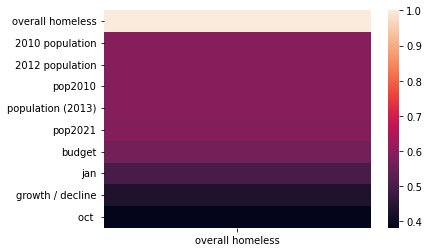

In [45]:
sns.heatmap(df2.corr()[['overall homeless']].sort_values(by='overall homeless', ascending = False).head(10))

<AxesSubplot:>

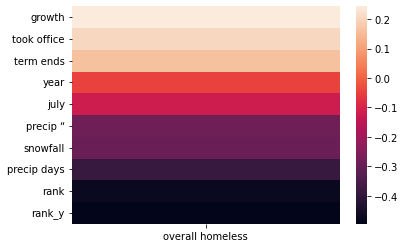

In [46]:
sns.heatmap(df2.corr()[['overall homeless']].sort_values(by='overall homeless', ascending = False).tail(10))

Temperatures in July have a higher impact than I would have assumed in that they have an impact at all, they are not that strong. It is interesting that the days were it precipitates have a higher impact than the ammount of snow.

<AxesSubplot:>

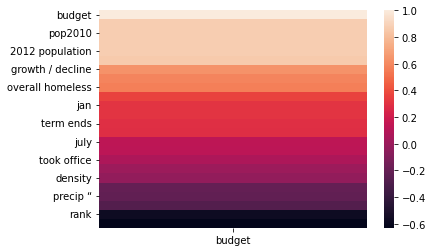

In [47]:
sns.heatmap(df2.corr()[['budget']].sort_values(by='budget', ascending = False))

In [48]:
df2['budget/pop'] = df2['budget'] / df2['pop2021']

<AxesSubplot:>

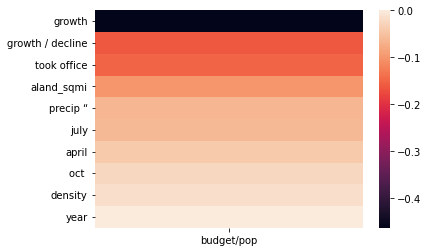

In [49]:
sns.heatmap(df2.corr()[['budget/pop']].sort_values(by='budget/pop', ascending = True).head(10))

In [50]:
df2['budget/homeless'] = df2['budget'] / df2['overall homeless']

In [54]:
df2.isna().sum()

city                                 0
jan                                  0
april                                0
july                                 0
oct                                  0
precip “                             0
precip days                          0
snowfall                             0
rank                                 0
state                                0
pop2021                              0
pop2010                              0
growth                               0
density                              0
aland_sqmi                           0
2010 population                      0
2012 population                      0
growth / decline                     0
rank_y                               0
population (2013)                    0
budget                               0
took office                          0
term ends                            0
government type                      0
overall homeless                     0
year                     

In [55]:
df2.city

0      albuquerque
1      albuquerque
2      albuquerque
3      albuquerque
4      albuquerque
          ...     
347        wichita
348        wichita
349        wichita
350        wichita
351        wichita
Name: city, Length: 189, dtype: object

In [56]:
df2.select_dtypes(np.number).columns

Index(['jan', 'april', 'july', 'oct ', 'precip “', 'precip days', 'snowfall',
       'rank', 'pop2021', 'pop2010', 'growth', 'density', 'aland_sqmi',
       '2010 population', '2012 population', 'growth / decline', 'rank_y',
       'population (2013)', 'budget', 'took office', 'term ends',
       'overall homeless', 'year', 'median household income (dollars)',
       'budget/pop', 'budget/homeless'],
      dtype='object')

In [57]:
from sklearn.preprocessing import StandardScaler
df2['%homeless'] = df2['overall homeless'] / df2['pop2021']
sc = StandardScaler()
s = sc.fit_transform(df2.select_dtypes(np.number))

In [58]:

dfsc = pd.DataFrame(s, columns =df2.select_dtypes(np.number).columns )

In [59]:
dfsc['city'] = df2['city']

In [60]:
dfsc['city'].isnull().sum()

84

In [61]:
dfsc = dfsc.dropna()

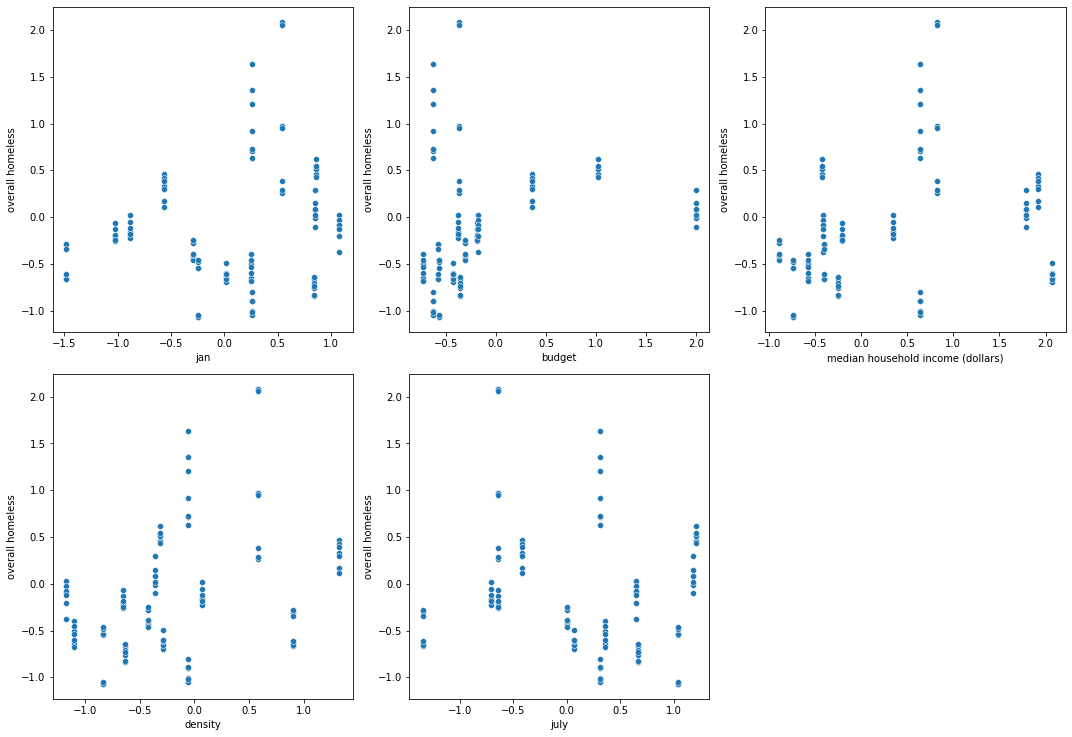

In [62]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x = 'jan' , y ='overall homeless', data =dfsc)

plt.subplot(3,3,2)
sns.scatterplot(x = 'budget' , y ='overall homeless', data =dfsc)

plt.subplot(3,3,3)
sns.scatterplot(x = 'median household income (dollars)' , y ='overall homeless', data =dfsc)


plt.subplot(3,3,4)
sns.scatterplot(x = 'density' , y ='overall homeless', data =dfsc)

plt.subplot(3,3,5)
sns.scatterplot(x = 'july' , y ='overall homeless', data =dfsc)

plt.tight_layout();

<h3>Correlation Summary</h3>

Homelessness is correlated highly with having a low budget, a median income around the mean of cities examined, population growth, and summer and winter temperatures.
Temperatures in July have a higher impact than I would have assumed in that they have an impact at all, it did not appear strong based on the Pearson but a scatter plot shows a bigger trend. It is interesting that the days were it precipitates have a higher impact than the ammount of snow.

<h3>Kmeans</h3>

In [63]:
from sklearn.cluster import KMeans

scores= []
for k in range(1, 20):
    km = KMeans(k)
    s = km.fit(dfsc.select_dtypes(np.number))
    scores.append(s.score(dfsc.select_dtypes(np.number)))

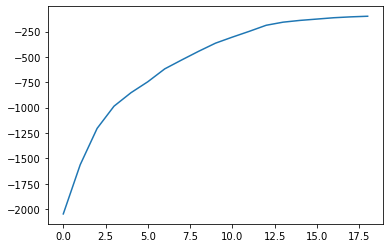

In [64]:
plt.plot(scores )

Cutting it off at 7 for the actual model. 

In [65]:
km = KMeans(7)

In [66]:
dfsc['group'] = km.fit_predict(dfsc.select_dtypes(np.number))

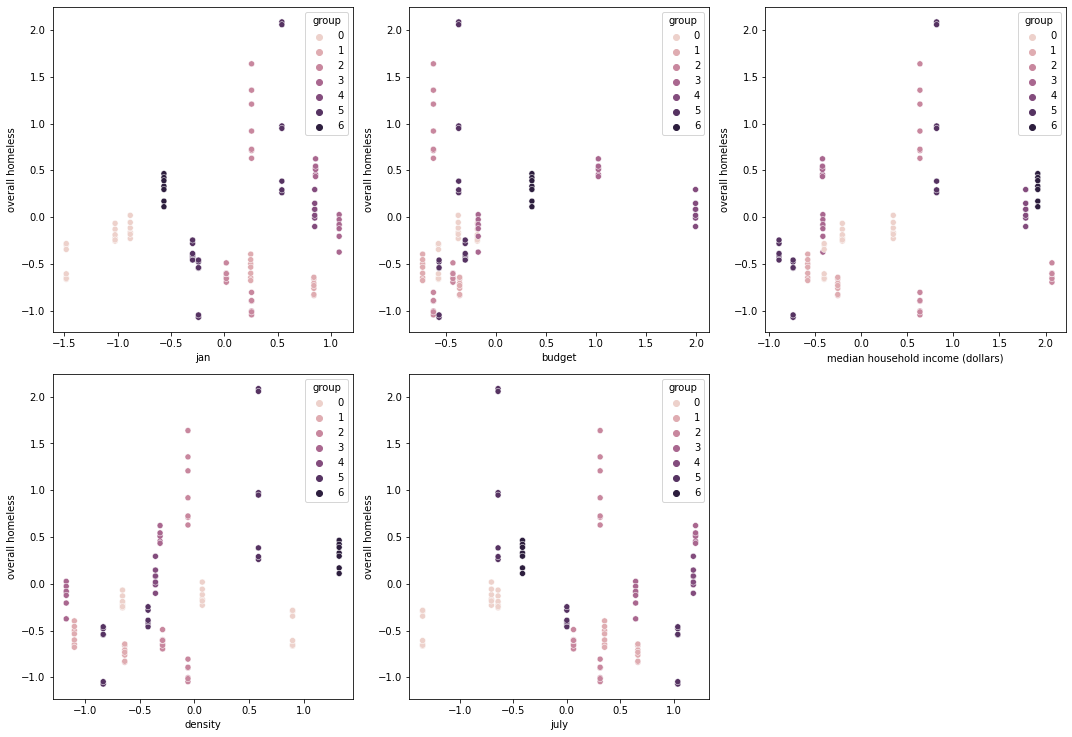

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x = 'jan' , y ='overall homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,2)
sns.scatterplot(x = 'budget' , y ='overall homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,3)
sns.scatterplot(x = 'median household income (dollars)' , y ='overall homeless', data =dfsc, hue = 'group')


plt.subplot(3,3,4)
sns.scatterplot(x = 'density' , y ='overall homeless',data =dfsc, hue = 'group')

plt.subplot(3,3,5)
sns.scatterplot(x = 'july' , y ='overall homeless', data =dfsc, hue = 'group')

plt.tight_layout();

These are the same charts as before just with hue seperating the groups. It looks like there are quite a few cases where patterns that apply accross the whole dataset are not true of individual cities.

In [68]:
dfsc.groupby('group').mean()   

,jan,april,july,oct,precip “,precip days,snowfall,rank,pop2021,pop2010,...,population (2013),budget,took office,term ends,overall homeless,year,median household income (dollars),budget/pop,budget/homeless,%homeless
group,,,,,,,,,,,,,,,,,,,,,
0,-1.129953,-1.078862,-0.897470,-1.027336,-0.068219,0.691229,0.687695,-0.755657,0.296877,0.326531,...,0.311368,-0.377973,-0.972130,0.780751,-0.272591,0.000000,-0.083896,-0.927677,-0.395506,-0.670935
1,0.543471,0.628854,0.507416,0.501568,1.371074,0.178207,-0.710790,2.393758,-0.955255,-0.934947,...,-0.931938,-0.546253,0.312152,-0.337142,-0.642608,0.000000,-0.414137,1.129529,-0.039650,0.497583
2,0.176135,0.246470,0.227819,0.036064,0.616399,0.205209,-0.578256,-0.139467,-0.315191,-0.442861,...,-0.416000,-0.558451,0.633222,-0.816239,-0.175207,0.000000,1.115543,-0.732694,0.019273,0.002014
3,0.966107,1.067295,0.921633,1.084515,0.251206,-0.291612,-0.732517,-1.097984,1.280994,1.164123,...,1.174182,0.423305,0.071349,0.141955,0.194782,0.000000,-0.415089,-0.601912,-0.127598,-0.701638
4,0.847611,1.151379,1.180518,1.154981,-0.381073,-0.745231,-0.708617,-1.097984,0.758517,0.498914,...,0.614739,1.992938,-0.169454,0.141955,0.072430,0.000000,1.784685,1.726840,1.338862,-0.589197
5,-0.000293,-0.033812,0.131169,-0.019455,-1.111692,-1.242052,-0.440653,-0.116645,-0.344676,-0.327502,...,-0.333097,-0.414715,0.151617,0.461353,-0.041021,0.285714,-0.268129,-0.357101,0.083086,0.228606
6,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.226810,0.186529,-0.379096,-0.175920,0.045103,...,0.002017,0.359814,1.034560,1.100149,0.311433,0.000000,1.915820,1.078595,-0.216090,0.541428


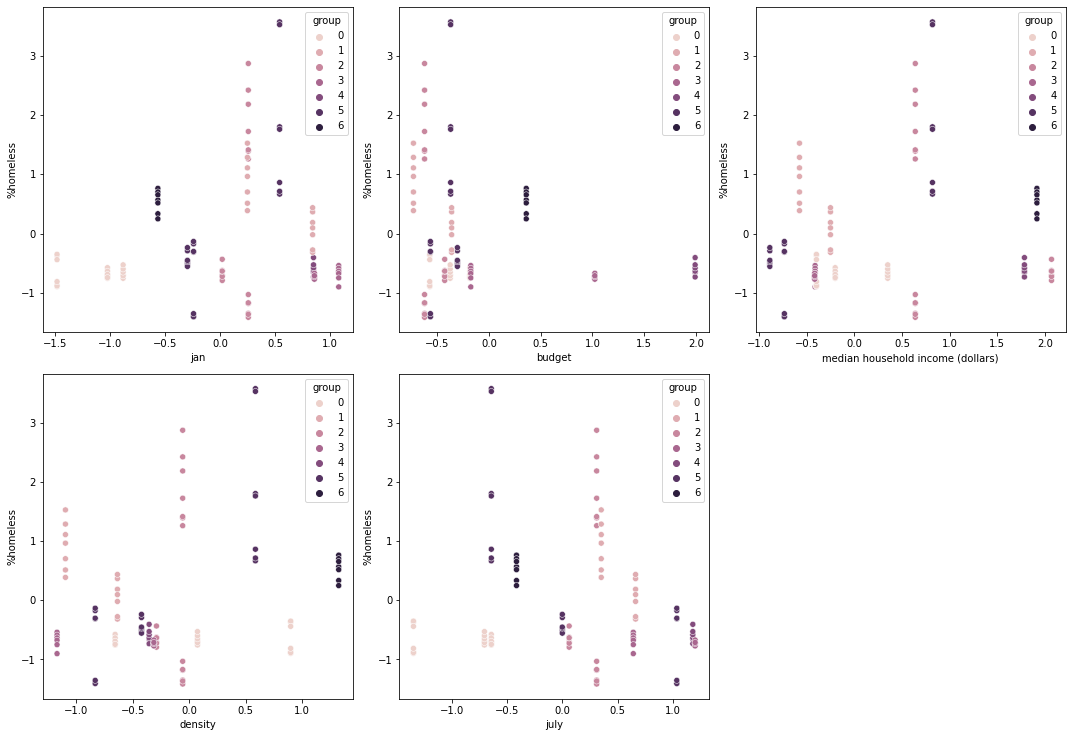

In [69]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x = 'jan' , y ='%homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,2)
sns.scatterplot(x = 'budget' , y ='%homeless', data =dfsc, hue = 'group')

plt.subplot(3,3,3)
sns.scatterplot(x = 'median household income (dollars)' , y ='%homeless', data =dfsc, hue = 'group')


plt.subplot(3,3,4)
sns.scatterplot(x = 'density' , y ='%homeless',data =dfsc, hue = 'group')

plt.subplot(3,3,5)
sns.scatterplot(x = 'july' , y ='%homeless', data =dfsc, hue = 'group')

plt.tight_layout();

These are aging the same except with percent homeless instead of count of homeless. Patterns are largely the same.

In [73]:
dfsc[dfsc['city'] == 'detroit']

,jan,april,july,oct,precip “,precip days,snowfall,rank,pop2021,pop2010,...,took office,term ends,overall homeless,year,median household income (dollars),budget/pop,budget/homeless,%homeless,city,group
112,-1.482807,-1.623409,-1.346205,-1.30493,-0.299398,0.550823,1.294599,-0.413329,-0.149921,-0.018712,...,-2.818285,1.100149,-0.297098,-1.5,-0.399037,-0.943566,-0.620066,-0.369845,detroit,0
113,-1.482807,-1.623409,-1.346205,-1.30493,-0.299398,0.550823,1.294599,-0.413329,-0.149921,-0.018712,...,-2.818285,1.100149,-0.284188,-1.0,-0.399037,-0.943566,-0.628885,-0.351460,detroit,0
114,-1.482807,-1.623409,-1.346205,-1.30493,-0.299398,0.550823,1.294599,-0.413329,-0.149921,-0.018712,...,-2.818285,1.100149,-0.346391,-0.5,-0.399037,-0.943566,-0.583870,-0.440041,detroit,0
115,-1.482807,-1.623409,-1.346205,-1.30493,-0.299398,0.550823,1.294599,-0.413329,-0.149921,-0.018712,...,-2.818285,1.100149,-0.648602,0.0,-0.399037,-0.943566,-0.214259,-0.870408,detroit,0
116,-1.482807,-1.623409,-1.346205,-1.30493,-0.299398,0.550823,1.294599,-0.413329,-0.149921,-0.018712,...,-2.818285,1.100149,-0.665620,0.5,-0.399037,-0.943566,-0.180446,-0.894643,detroit,0
117,-1.482807,-1.623409,-1.346205,-1.30493,-0.299398,0.550823,1.294599,-0.413329,-0.149921,-0.018712,...,-2.818285,1.100149,-0.657405,1.0,-0.399037,-0.943566,-0.197046,-0.882943,detroit,0
118,-1.482807,-1.623409,-1.346205,-1.30493,-0.299398,0.550823,1.294599,-0.413329,-0.149921,-0.018712,...,-2.818285,1.100149,-0.607525,1.5,-0.399037,-0.943566,-0.287544,-0.811912,detroit,0


In [74]:
dfsc[dfsc['city'] == 'baltimore']

,jan,april,july,oct,precip “,precip days,snowfall,rank,pop2021,pop2010,...,took office,term ends,overall homeless,year,median household income (dollars),budget/pop,budget/homeless,%homeless,city,group
28,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.22681,0.186529,-0.379096,-0.17592,0.045103,...,1.03456,1.100149,0.329625,-1.5,1.91582,1.078595,-0.235266,0.567879,baltimore,6
29,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.22681,0.186529,-0.379096,-0.17592,0.045103,...,1.03456,1.100149,0.464006,-1.0,1.91582,1.078595,-0.316721,0.763282,baltimore,6
30,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.22681,0.186529,-0.379096,-0.17592,0.045103,...,1.03456,1.100149,0.422342,-0.5,1.91582,1.078595,-0.292930,0.702699,baltimore,6
31,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.22681,0.186529,-0.379096,-0.17592,0.045103,...,1.03456,1.100149,0.389480,0.0,1.91582,1.078595,-0.273274,0.654915,baltimore,6
32,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.22681,0.186529,-0.379096,-0.17592,0.045103,...,1.03456,1.100149,0.295002,0.5,1.91582,1.078595,-0.211870,0.517536,baltimore,6
33,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.22681,0.186529,-0.379096,-0.17592,0.045103,...,1.03456,1.100149,0.169423,1.0,1.91582,1.078595,-0.116911,0.334932,baltimore,6
34,-0.566439,-0.662443,-0.414217,-0.792448,0.202624,0.22681,0.186529,-0.379096,-0.17592,0.045103,...,1.03456,1.100149,0.110154,1.5,1.91582,1.078595,-0.065657,0.248750,baltimore,6


Baltimore and Detroit perform much differently, it appears as if the budget to population ratio may attract people to Baltimore.

In [91]:
dfsc.groupby('group').mean().to_csv('../output/model-groups.csv')

In [78]:
df2.groupby('city').mean().sort_values('%homeless', ascending = False).loc[['sacramento', 'tulsa']]

,jan,april,july,oct,precip “,precip days,snowfall,rank,pop2021,pop2010,...,population (2013),budget,took office,term ends,overall homeless,year,median household income (dollars),budget/pop,budget/homeless,%homeless
city,,,,,,,,,,,,,,,,,,,,,
sacramento,46.3,58.9,75.4,64.4,17.93,58.0,0.0,36.0,525398.0,467286.0,...,479686.0,819.0,2016.0,2024.0,3709.428571,2017.0,63874.0,0.001559,0.245081,0.007060
tulsa,36.4,60.8,83.5,62.6,42.42,91.0,10.2,48.0,402742.0,392403.0,...,398121.0,597.0,2016.0,2024.0,633.642857,2017.0,52444.0,0.001482,1.930351,0.001573


These two cities again do not perform very similarly. But they have a lot else in common. I wonder if it is the fact that Tulsa gets a lot more rain.

In [79]:
df2['city'].unique()

array(['albuquerque', 'atlanta', 'austin', 'baltimore', 'baton rouge',
       'birmingham', 'buffalo', 'cleveland', 'columbus', 'detroit',
       'houston', 'indianapolis', 'jacksonville', 'madison', 'miami',
       'milwaukee', 'new orleans', 'pittsburgh', 'raleigh', 'sacramento',
       'san antonio', 'san diego', 'tucson', 'tulsa', 'wichita'],
      dtype=object)

In [80]:
df2.groupby('city').mean().sort_values('%homeless', ascending = False).loc[['sacramento', 'tulsa', 'san diego', 'san antonio']]

,jan,april,july,oct,precip “,precip days,snowfall,rank,pop2021,pop2010,...,population (2013),budget,took office,term ends,overall homeless,year,median household income (dollars),budget/pop,budget/homeless,%homeless
city,,,,,,,,,,,,,,,,,,,,,
sacramento,46.3,58.9,75.4,64.4,17.93,58.0,0.0,36.0,525398.0,467286.0,...,479686.0,819.0,2016.0,2024.0,3709.428571,2017.0,63874.0,0.001559,0.245081,0.007060
tulsa,36.4,60.8,83.5,62.6,42.42,91.0,10.2,48.0,402742.0,392403.0,...,398121.0,597.0,2016.0,2024.0,633.642857,2017.0,52444.0,0.001482,1.930351,0.001573
san diego,57.8,62.6,70.9,67.6,10.77,41.0,0.0,8.0,1427720.0,1305910.0,...,1355896.0,3200.0,2020.0,2024.0,8484.714286,2017.0,70218.0,0.002241,0.378255,0.005943
san antonio,50.3,68.6,84.3,70.7,32.92,82.0,0.7,7.0,1581730.0,1332300.0,...,1409019.0,2400.0,2017.0,2023.0,2882.428571,2017.0,54784.0,0.001517,0.833568,0.001822


In [81]:
df2.groupby('city').mean().sort_values('%homeless', ascending = False)

,jan,april,july,oct,precip “,precip days,snowfall,rank,pop2021,pop2010,...,population (2013),budget,took office,term ends,overall homeless,year,median household income (dollars),budget/pop,budget/homeless,%homeless
city,,,,,,,,,,,,,,,,,,,,,
miami,68.1,75.7,83.7,78.8,58.53,131.0,0.0,42.0,478251.0,400779.0,...,417650.0,523.0,2017.0,2021.0,3830.285714,2017.0,51796.0,0.001094,0.137449,0.008009
sacramento,46.3,58.9,75.4,64.4,17.93,58.0,0.0,36.0,525398.0,467286.0,...,479686.0,819.0,2016.0,2024.0,3709.428571,2017.0,63874.0,0.001559,0.245081,0.007060
san diego,57.8,62.6,70.9,67.6,10.77,41.0,0.0,8.0,1427720.0,1305910.0,...,1355896.0,3200.0,2020.0,2024.0,8484.714286,2017.0,70218.0,0.002241,0.378255,0.005943
birmingham,42.6,61.3,80.2,62.9,53.99,117.0,1.5,116.0,207235.0,212328.0,...,212113.0,411.0,2017.0,2021.0,1076.000000,2017.0,53611.0,0.001983,0.390939,0.005192
cleveland,25.7,47.6,71.9,52.2,38.71,155.0,57.6,54.0,376599.0,395926.0,...,390113.0,1470.0,2006.0,2022.0,1795.857143,2017.0,52538.0,0.003903,0.824597,0.004769
baltimore,32.3,53.2,76.5,55.4,41.94,115.0,21.5,31.0,575584.0,620915.0,...,622104.0,1648.0,2020.0,2024.0,2536.000000,2017.0,71935.0,0.002863,0.654373,0.004406
atlanta,42.7,61.6,80.0,62.8,50.20,115.0,2.1,37.0,524067.0,429410.0,...,447841.0,533.0,2018.0,2022.0,2081.285714,2017.0,62547.0,0.001017,0.811481,0.003971
new orleans,52.6,68.2,82.7,70.0,64.16,114.0,0.2,53.0,388424.0,347772.0,...,378715.0,505.0,2018.0,2022.0,1470.285714,2017.0,46647.0,0.001300,0.355419,0.003785
buffalo,24.5,45.3,70.8,50.7,40.54,169.0,93.6,90.0,254290.0,261275.0,...,258959.0,479.0,2005.0,2021.0,949.571429,2017.0,51644.0,0.001884,0.506495,0.003734


In [82]:
four = df2.groupby('city').mean().sort_values('%homeless', ascending = False).loc[['sacramento', 'tulsa', 'san diego', 'san antonio']]

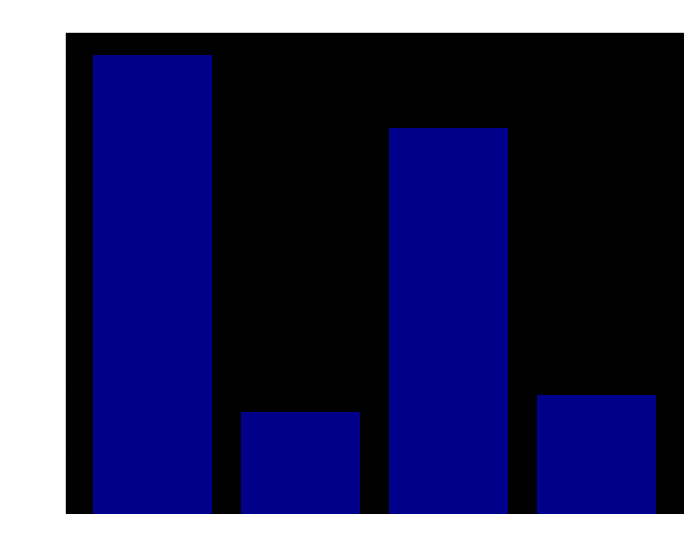

In [83]:
plt.figure(figsize=(10,8))
COLOR = 'white'
plt.style.use('dark_background')
plt.rcParams['text.color'] = COLOR
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.bar(four.index,four['%homeless'], color='darkblue' )
plt.title('Percent of Population that is Homeless')
plt.xticks( ticks = four.index,labels=['Sacramento', 'Tulsa', 'San Diego', 'San Antonio'])
plt.yticks( ticks = [0.001,0.002,0.003,0.004,0.005,0.006,0.007 ], labels= ['0.1%','0.2%','0.3%','0.4%','0.5%','0.6%','0.7%' ] )
plt.tight_layout()
plt.savefig('../output/perhomeless.png')

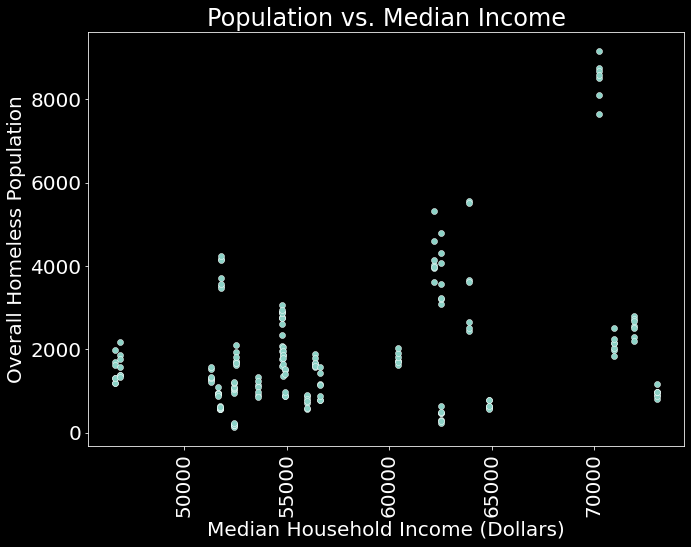

In [84]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'median household income (dollars)' , y ='overall homeless', data =df2)
plt.xlabel('Median Household Income (Dollars)')
plt.ylabel('Overall Homeless Population')
plt.xticks(rotation = 90);
plt.title('Population vs. Median Income')
plt.tight_layout()
plt.savefig('../output/income-homeless.png')

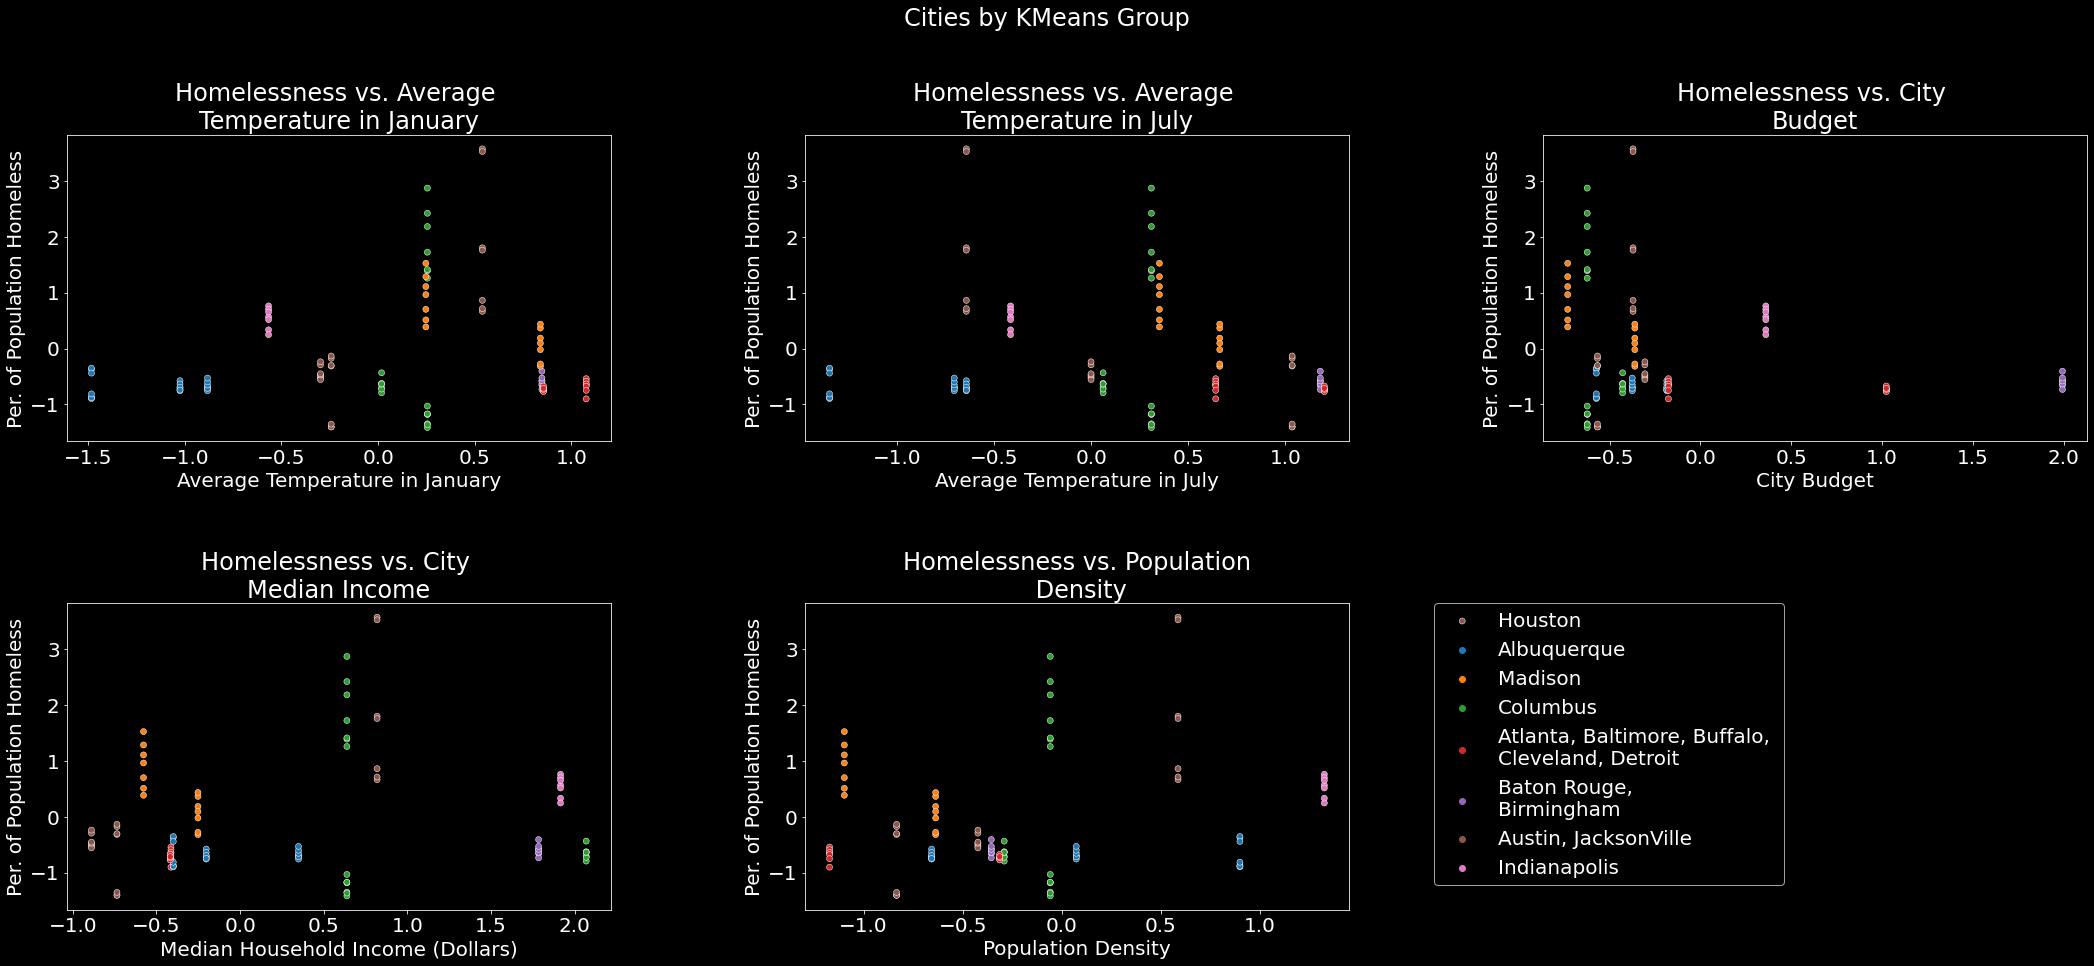

In [85]:
plt.figure(figsize=(30,20))
plt.suptitle('Cities by KMeans Group')
plt.subplot(3,3,1)
sns.set_palette('winter_r')
sns.scatterplot(x = 'jan' , y ='%homeless', data =dfsc, hue = 'group', palette=sns.color_palette("tab10",7))
plt.legend().remove()
plt.title('Homelessness vs. Average \nTemperature in January')
plt.ylabel('Per. of Population Homeless')
plt.xlabel('Average Temperature in January')


plt.subplot(3,3,2)
sns.scatterplot(x = 'july' , y ='%homeless', data =dfsc, hue = 'group', palette=sns.color_palette("tab10",7))
plt.title('Homelessness vs. Average \nTemperature in July')
plt.ylabel('Per. of Population Homeless')
plt.xlabel('Average Temperature in July')
plt.legend().remove()

plt.subplot(3,3,3)
sns.scatterplot(x = 'budget' , y ='%homeless', data =dfsc, hue = 'group', palette=sns.color_palette("tab10",7))
plt.legend().remove()
plt.ylabel('Per. of Population Homeless')
plt.xlabel('City Budget')
plt.title('Homelessness vs. City \nBudget')

plt.subplot(3,3,4)
sns.scatterplot(x = 'median household income (dollars)' , y ='%homeless', data =dfsc, hue = 'group', palette=sns.color_palette("tab10",7))
plt.legend().remove()
plt.ylabel('Per. of Population Homeless')
plt.xlabel('Median Household Income (Dollars)')
plt.title('Homelessness vs. City \nMedian Income')


plt.subplot(3,3,5)
sns.scatterplot(x = 'density' , y ='%homeless',data =dfsc, hue = 'group', palette=sns.color_palette("tab10",7))
labels = ['Houston', 'Albuquerque', 'Madison', 'Columbus', 'Atlanta, Baltimore, Buffalo, \nCleveland, Detroit', 'Baton Rouge, \nBirmingham', 'Austin, JacksonVille', 'Indianapolis']
plt.ylabel('Per. of Population Homeless')
plt.xlabel('Population Density')
plt.legend(bbox_to_anchor=(1.8, 1), loc=1, borderaxespad=0., labels=labels)
plt.title('Homelessness vs. Population\n Density')

plt.tight_layout(h_pad=(3), w_pad=-10 , pad=2);
plt.savefig('../output/kmeans.png')

In [88]:
labels = ['Houston', 'Albuquerque', 'Madison', 'Columbus', 'Atlanta, Baltimore, Buffalo, Cleveland, Detroit', 'Baton Rouge, Birmingham', 'Austin, JacksonVille', 'Indianapolis']



<h3>Kmeans Summary</h3>

It appears that many of our patterns actually start to break down as we group our cities based off our Kmeans model. Certain cities have a far lower population of homeless than patterns accross the whole would suggest. In the above cells I contrast a couple different groups of cities.